In [1]:
from skimage.metrics import structural_similarity as ssim
import cv2
import imutils
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt


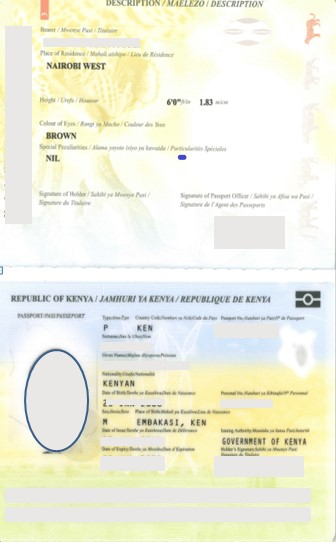

In [2]:
# original passport url
original = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/8/8b/East_African_Community%2C_Republic_of_Kenya%2C_Passport.jpg', stream=True).raw)
original

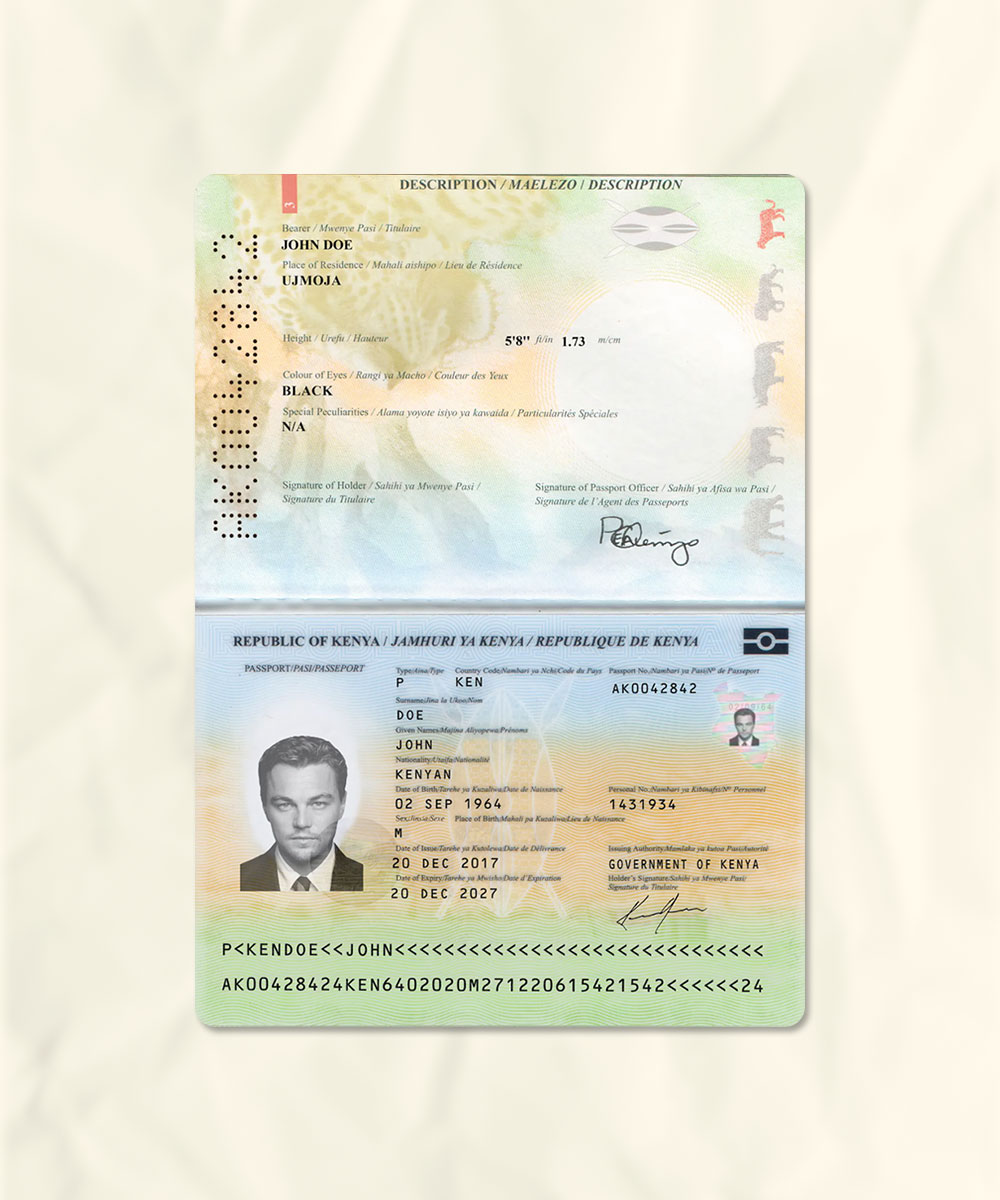

In [3]:
# fake passport
fake = Image.open(requests.get('https://fakesample.com/wp-content/uploads/2023/01/Kenya-2.jpg', stream=True).raw)
fake

In [4]:
# checking the file format of the images
print(original.format, original.size, original.mode)
print(fake.format, fake.size, fake.mode)


JPEG (336, 542) RGB
JPEG (1000, 1200) RGB


In [5]:
# resize the fake image same to original
fake = fake.resize(original.size)
print(fake.format, fake.size, fake.mode)

None (336, 542) RGB


In [6]:
print(original)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x542 at 0x18B02CD6490>


In [7]:
# saving the images to local folder
original.save('original.jpg')
fake.save('fake.jpg')

In [8]:
# Convert images to grayscale using NumPy and OpenCV
original_np = np.array(original)
fake_np = np.array(fake)

In [10]:
# Convert both images to grayscale
original_gray = cv2.cvtColor(original_np, cv2.COLOR_RGB2GRAY)
fake_gray = cv2.cvtColor(fake_np, cv2.COLOR_RGB2GRAY)

In [11]:
# Compute SSIM between the two grayscale images
(score, diff) = ssim(original_gray, fake_gray, full=True)
print(f"SSIM score: {score}")

SSIM score: 0.5728572021761655


In [12]:
# The diff image contains the difference between the two images
# Normalize the difference image to 0-255 and convert it to an 8-bit image
diff = (diff * 255).astype("uint8")

In [14]:
# Threshold the difference image to highlight the areas with large differences
thresh = cv2.threshold(diff, 128, 255, cv2.THRESH_BINARY_INV)[1]

In [15]:
# Save the resulting difference and threshold images
cv2.imwrite('difference.jpg', diff)
cv2.imwrite('threshold.jpg', thresh)

True

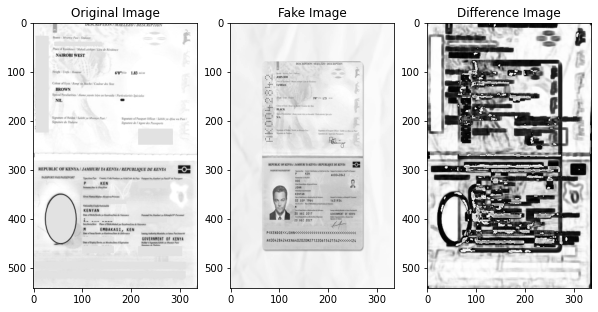

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Fake Image')
plt.imshow(fake_gray, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Difference Image')
plt.imshow(diff, cmap='gray')

plt.show()

In [ ]:
# Find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)